In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_validate

In [2]:
#Mounting drive folder to colab for access of features and labels data
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
cd '/content/drive/My Drive/Btech - Mechanical Engineering/Sem 4/Applied Machine Learning/Drowsiness Detection Project/Drowsiness/videos/data'

/content/drive/.shortcut-targets-by-id/1CZPaoJcaUKraM0cNUJ1AiIOMZHGg3jSI/Drowsiness/videos/data


In [0]:
features_csv=["./features_"+str(x)+".csv" for x in range(1,26)]

In [0]:
labels_csv=["./labels_"+str(x)+".csv" for x in range(1,26)]

In [0]:
#Loading the data from csv files
features=[]
labels=[]
for x in features_csv:
  features.append(pd.read_csv(x,header=None))

for x in labels_csv:
  labels.append(pd.read_csv(x,header=None))

In [7]:
X=pd.concat(features)
X.shape

(7845, 4)

In [8]:
y=pd.concat(labels)
y.shape

(7845, 1)

In [0]:
y.replace(10,1,True)

In [10]:
y_np=y.values
y_np.reshape(-1,1)
y_np.shape

(7845, 1)

In [0]:
X_np=X.values

In [12]:
y[0].value_counts()

0.0    4223
1.0    3622
Name: 0, dtype: int64

In [0]:
#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_np,y_np,test_size = 0.20, random_state=30)

# K Nearest Neighbors

Here, we will be using the K Nearest Neighbors Model to predict the alert or drowsy state of person. The only hyper parameter is number of neighbors n_neighbors, and hyper parameter tuning is done by the menthod of grid search. We will be using the GridSearchCV menthod to do cross validation as well.

In [0]:
#Initialising KNN classifiesr and the range of hyper_parameter
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
grid_search_dict={'n_neighbors':list(np.arange(1,31))}

In [15]:
knn_cv=GridSearchCV(knn,grid_search_dict,cv=5)
knn_cv.fit(X_train,y_train.reshape(-1))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
knn_cv.best_score_

0.7468161747912807

In [17]:
knn_cv.best_params_

{'n_neighbors': 10}

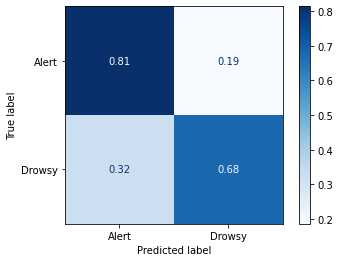

In [18]:
plot_confusion_matrix(knn_cv,X_test,y_test,cmap='Blues',display_labels=['Alert','Drowsy'],normalize='true')

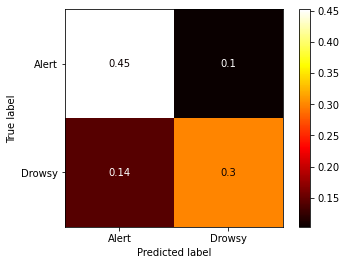

In [19]:
plot_confusion_matrix(knn_cv,X_test,y_test,cmap='hot',display_labels=['Alert','Drowsy'],normalize='all')

In [20]:
knn_cv_acc=accuracy_score(y_test.reshape(-1),knn_cv.predict(X_test))
knn_cv_acc

0.7533460803059273

In [21]:
knn_cv_conf=confusion_matrix(y_test,knn_cv.predict(X_test))
knn_cv_prec=knn_cv_conf[1,1]/(knn_cv_conf[1,1]+knn_cv_conf[1,0])
knn_cv_prec

0.6771879483500718

In the previous case, we did not Normalize the input X parameters and also we got an accuracy of 75% for the test data and precission of 68%. Now lets try to improve the accuracy and precission by normalizing the data 

In [0]:
#Normalising the features
X_norm=scale(X_np)

In [23]:
X_np

array([[0.3       , 0.64122345, 0.63825077, 2.1374115 ],
       [0.3       , 0.64122345, 0.63825077, 2.1374115 ],
       [0.25285138, 0.43050426, 0.38903008, 1.70259806],
       ...,
       [0.3       , 0.64122345, 0.63825077, 2.1374115 ],
       [0.3       , 0.64122345, 0.63825077, 2.1374115 ],
       [0.3       , 0.64122345, 0.63825077, 2.1374115 ]])

In [24]:
X_norm

array([[ 0.3008243 ,  3.06790499,  2.90405266,  0.9415773 ],
       [ 0.3008243 ,  3.06790499,  2.90405266,  0.9415773 ],
       [-0.37411728,  0.56020966, -0.58242535,  0.29558012],
       ...,
       [ 0.3008243 ,  3.06790499,  2.90405266,  0.9415773 ],
       [ 0.3008243 ,  3.06790499,  2.90405266,  0.9415773 ],
       [ 0.3008243 ,  3.06790499,  2.90405266,  0.9415773 ]])

In [0]:
X_train_norm,X_test_norm,y_train_norm,y_test_norm=train_test_split(X_norm,y_np,test_size=0.2,random_state=30)

In [26]:
knn_cv_norm=GridSearchCV(knn,grid_search_dict,cv=5)
knn_cv_norm.fit(X_train_norm,y_train_norm.reshape(-1))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
#Precision of the knn after normalization and hyper parameter tuning for training set and cross_validation of 5
knn_cv_norm.best_score_

0.7605178014058417

In [28]:
knn_cv_norm.best_params_

{'n_neighbors': 24}

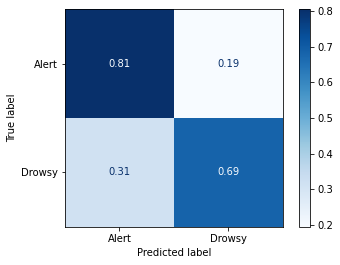

In [29]:
plot_confusion_matrix(knn_cv_norm,X_test_norm,y_test_norm,cmap='Blues',display_labels=['Alert','Drowsy'],normalize='true')

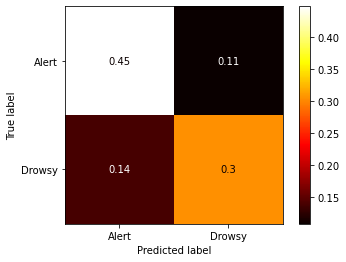

In [30]:
plot_confusion_matrix(knn_cv_norm,X_test_norm,y_test_norm,cmap='hot',display_labels=['Alert','Drowsy'],normalize='all')

We can see that the accuracy and precision of both the normalized and regular data are the same. The reason for this is the features are tightly bound in the same range. Hence, we will be using only one of the two in our subsequent analysis.

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg_cv=cross_validate(log_reg,X_train,y_train.reshape(-1),cv=5)

In [32]:
log_reg_cv['test_score']

array([0.71019108, 0.70677291, 0.71952191, 0.69163347, 0.71553785])

In [33]:
log_reg.fit(X_train,y_train.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
log_reg.score(X_test,y_test.reshape(-1))

0.7176545570427023

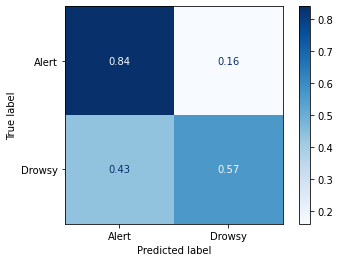

In [35]:
plot_confusion_matrix(log_reg,X_test,y_test.reshape(-1),normalize='true',cmap='Blues',labels=[0,1],display_labels=['Alert','Drowsy'])

Text(0.5, 1.0, 'ROC Curve')

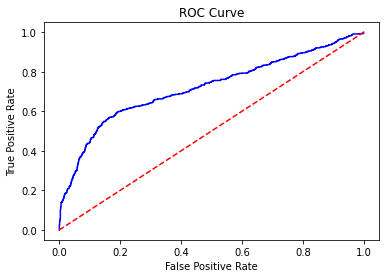

In [36]:
fpr,tpr,thresh=roc_curve(y_test.reshape(-1),log_reg.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,c='b')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")

In [37]:
#Confusuin matrix when threshold has been decreasend to 0.4
predict=log_reg.predict_proba(X_test)[:,1]>0.4
actual=y_test.reshape(-1)>0.5
#Confusiion matrix normalized for each state
cm=confusion_matrix(actual,predict,[True,False],normalize='true')
cm

array([[0.69296987, 0.30703013],
       [0.40825688, 0.59174312]])

In [38]:
print("Precision:")
print(cm[1][1])
log_reg_prec=cm[1][1]

Precision:
0.591743119266055


In [39]:
#Confusion matrix as percentage of each prediction
cm=confusion_matrix(actual,predict,[True,False],normalize='all')
cm

array([[0.30783939, 0.13639261],
       [0.22689611, 0.32887189]])

In [40]:
print("Accuracy: ")
print(cm[0][0]+cm[1,1])
log_reg_acc=cm[0][0]+cm[1,1]

Accuracy: 
0.6367112810707457


We can see than by decreasing the threshold, the accuracy has decreased to 65% but the precision has increased to 62% from 56% for Logistic Regression. This is better as a high precision is desired as oposed to a high accuracy

#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
hyper_param={'max_depth':[x for x in range(1,11)]}

In [42]:
dec_tree_hyp=GridSearchCV(dec_tree,hyper_param)
dec_tree_hyp.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
   

In [43]:
dec_tree_hyp.best_params_

{'max_depth': 6}

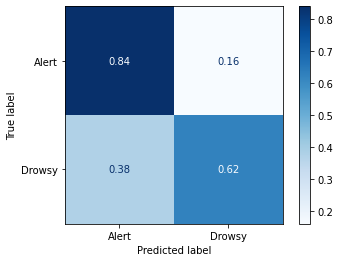

In [44]:
plot_confusion_matrix(dec_tree_hyp,X_test,y_test.reshape(-1),normalize='true',cmap='Blues',labels=[0,1],display_labels=['Alert','Drowsy'])

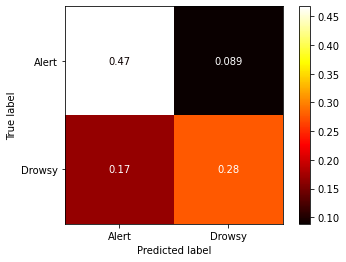

In [45]:
plot_confusion_matrix(dec_tree_hyp,X_test,y_test.reshape(-1),normalize='all',cmap='hot',labels=[0,1],display_labels=['Alert','Drowsy'])

In [46]:
#Accuracy
dec_tree_acc=accuracy_score(y_test,dec_tree_hyp.predict(X_test))
dec_tree_acc

0.7444231994901211

In [47]:
#Precision
dec_tree_cm=confusion_matrix(y_test.reshape(-1),dec_tree_hyp.predict(X_test))
dec_tree_prec=dec_tree_cm[1,1]/(dec_tree_cm[1,1]+dec_tree_cm[1,0])
dec_tree_prec

0.624103299856528

In [48]:
#Extracting the feature importance of each feature
dec_tree=DecisionTreeClassifier(max_depth=10)
dec_tree.fit(X_train,y_train)
feature_imp=dec_tree.feature_importances_
feature_imp

array([0.43834603, 0.26989232, 0.16894677, 0.12281487])

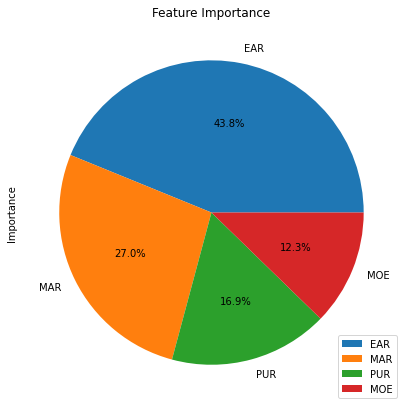

In [49]:
feature_imp_df=pd.DataFrame({"Feature":["EAR","MAR","PUR","MOE"],"Importance":feature_imp})
feature_imp_df=feature_imp_df.set_index("Feature")
feature_imp_df.plot(kind='pie',title="Feature Importance",legend=True,y="Importance",figsize=(7,7),autopct='%1.1f%%')

From the above confusion matrix where we normalize with respect to total number of samplas and number of samples for each true state gives us an accuracy of 73% and a precision of 66%

#Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

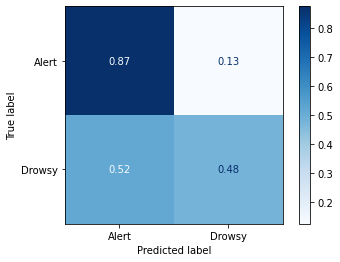

In [51]:
plot_confusion_matrix(clf_NB,X_test,y_test,normalize='true',cmap='Blues',labels=[0,1],display_labels=['Alert','Drowsy'])

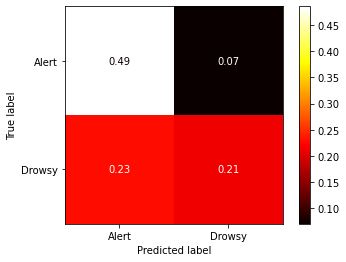

In [52]:
plot_confusion_matrix(clf_NB,X_test,y_test,normalize='all',cmap='hot',labels=[0,1],display_labels=['Alert','Drowsy'])

In [53]:
clf_NB_acc=accuracy_score(y_test.reshape(-1),clf_NB.predict(X_test))
clf_NB_acc

0.6998087954110899

In [54]:
nb_cm=confusion_matrix(y_test.reshape(-1),clf_NB.predict(X_test))
clf_NB_prec=nb_cm[1,1]/(nb_cm[1,1]+nb_cm[1,0])
clf_NB_prec

0.48206599713055953

Accuracy for Naive Bayes is 70% and Precision is 48%

#Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_RF=RandomForestClassifier()
hyper_param_RF={'max_depth':[x for x in range(1,20)]}

In [56]:
clf_RF_hyp=GridSearchCV(clf_RF,hyper_param_RF,cv=5)
clf_RF_hyp.fit(X_train,y_train.reshape(-1))

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [57]:
clf_RF_hyp.best_params_

{'max_depth': 15}

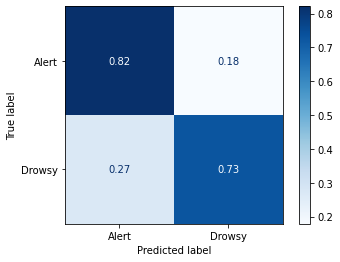

In [58]:
plot_confusion_matrix(clf_RF_hyp,X_test,y_test,normalize='true',cmap='Blues',labels=[0,1],display_labels=['Alert','Drowsy'])

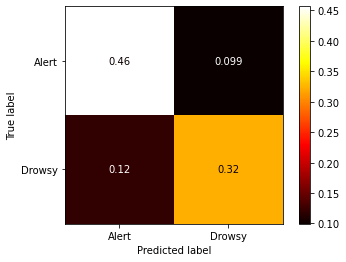

In [59]:
plot_confusion_matrix(clf_RF_hyp,X_test,y_test,normalize='all',cmap='hot',labels=[0,1],display_labels=['Alert','Drowsy'])

In [60]:
clf_RF_acc=accuracy_score(y_test.reshape(-1),clf_RF_hyp.predict(X_test))
clf_RF_acc

0.780114722753346

In [61]:
rf_cm=confusion_matrix(y_test,clf_RF_hyp.predict(X_test))
clf_RF_prec=rf_cm[1,1]/(rf_cm[1,1]+rf_cm[1,0])
clf_RF_prec

0.7288378766140603

Accuracy for Random Forest Tree is 78% and the precision is 74%

#Comparison

,Accuracy
Model,
Logistic Regression,0.636711
Naive Bayes,0.699809
KNN,0.753346
Decision Tree,0.744423
Random Forest,0.780115
CNN,0.695400
LSTM,0.760000


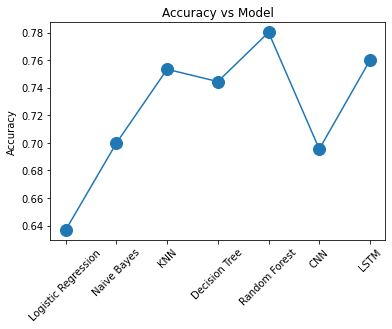

In [65]:
#Accuracy of all models
acc_df=pd.DataFrame({'Model':['Logistic Regression','Naive Bayes', 'KNN','Decision Tree','Random Forest','CNN','LSTM'],
        'Accuracy':[log_reg_acc,clf_NB_acc,knn_cv_acc,dec_tree_acc,clf_RF_acc,0.6954,0.76]})
acc_df=acc_df.set_index('Model')
plt.plot(acc_df['Accuracy'],marker='o',markersize=12)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Accuracy vs Model")
acc_df

,Precision
Model,
Logistic Regression,0.591743
Naive Bayes,0.482066
KNN,0.677188
Decision Tree,0.624103
Random Forest,0.728838
CNN,0.571000
LSTM,0.720000


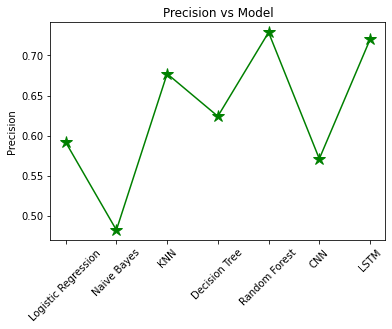

In [66]:
#Precision of all models
prec_df=pd.DataFrame({'Model':['Logistic Regression','Naive Bayes', 'KNN','Decision Tree','Random Forest','CNN','LSTM'],
        'Precision':[log_reg_prec,clf_NB_prec,knn_cv_prec,dec_tree_prec,clf_RF_prec,0.5710,0.72]})
prec_df=prec_df.set_index('Model')
plt.plot(prec_df['Precision'],marker='*',markersize=12,color='g')
plt.xticks(rotation=45)
plt.ylabel("Precision")
plt.title("Precision vs Model")
prec_df

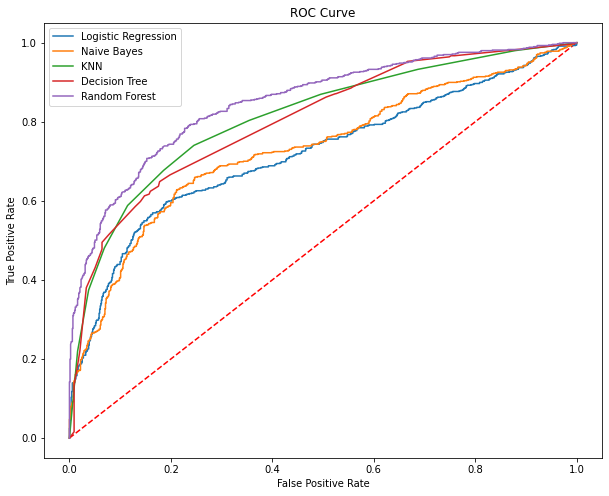

In [64]:
#ROC
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_1, tpr_1, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
fpr_2, tpr_2, thresholds = roc_curve(y_test, clf_NB.predict_proba(X_test)[:,1])
fpr_3, tpr_3, thresholds = roc_curve(y_test, knn_cv.predict_proba(X_test)[:,1])
fpr_4, tpr_4, thresholds = roc_curve(y_test, dec_tree_hyp.predict_proba(X_test)[:,1])
fpr_5, tpr_5, thresholds = roc_curve(y_test, clf_RF_hyp.predict_proba(X_test)[:,1])

plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "Naive Bayes")
plt.plot(fpr_3, tpr_3, label= "KNN")
plt.plot(fpr_4, tpr_4, label= "Decision Tree")
plt.plot(fpr_5, tpr_5, label= "Random Forest")

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()